<a href="https://colab.research.google.com/github/reinhardbuyabo/ICS4102/blob/main/Simple_Moving_Average.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -nc https://lazyprogrammer.me/course_files/sp500_close.csv

--2025-09-23 10:33:15--  https://lazyprogrammer.me/course_files/sp500_close.csv
Resolving lazyprogrammer.me (lazyprogrammer.me)... 104.21.23.210, 172.67.213.166, 2606:4700:3031::6815:17d2, ...
Connecting to lazyprogrammer.me (lazyprogrammer.me)|104.21.23.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4143332 (4.0M) [text/csv]
Saving to: ‘sp500_close.csv’

sp500_close.csv     100%[===================>]   3.95M  8.78MB/s    in 0.4s    

2025-09-23 10:33:16 (8.78 MB/s) - ‘sp500_close.csv’ saved [4143332/4143332]



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
close = pd.read_csv('sp500_close.csv', index_col=0, parse_dates=True)

In [ ]:
goog = close[['GOOG']].copy().dropna()

In [ ]:
goog.head()

,GOOG
2014-03-27,558.46
2014-03-28,559.99
2014-03-31,556.97
2014-04-01,567.16
2014-04-02,567.00


<Axes: >

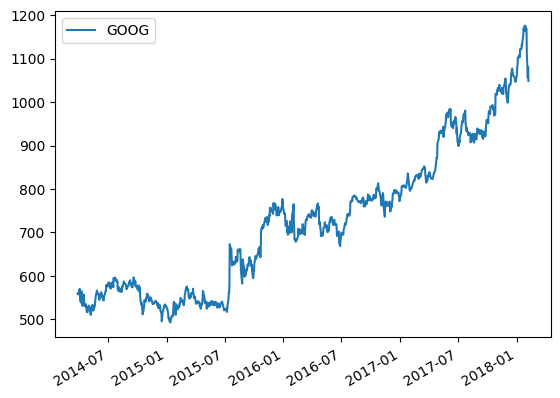

In [ ]:
goog.plot()

In [ ]:
goog_ret = np.log(goog.pct_change(1) + 1) # percent change + 1

<Axes: >

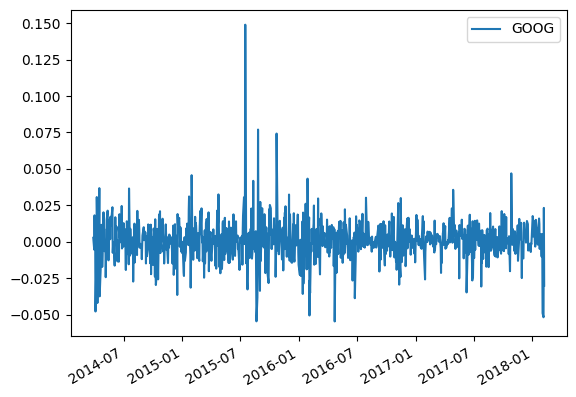

In [ ]:
goog_ret.plot()

In [ ]:
goog['SMA-10'] = goog['GOOG'].rolling(10).mean() # rolling window average
goog.head(20)

,GOOG,SMA-10
2014-03-27,558.46,NaN
2014-03-28,559.99,NaN
2014-03-31,556.97,NaN
2014-04-01,567.16,NaN
2014-04-02,567.00,NaN
2014-04-03,569.74,NaN
2014-04-04,543.14,NaN
2014-04-07,538.15,NaN
2014-04-08,554.90,NaN
2014-04-09,564.14,557.965


In [ ]:
type(goog['GOOG'].rolling(10))

pandas.core.window.rolling.Rolling

<Axes: >

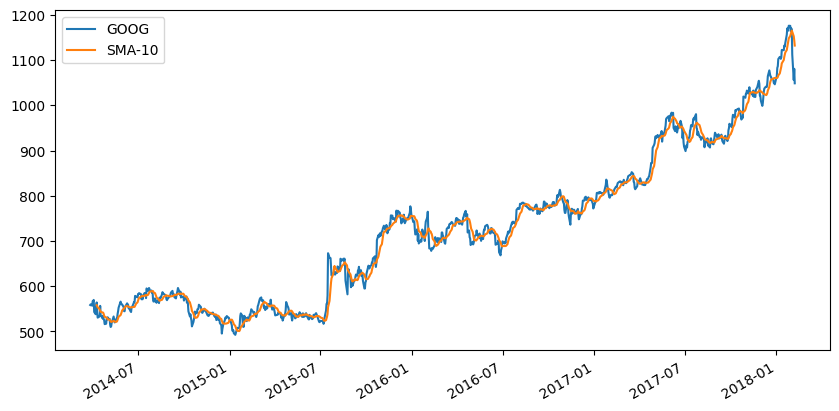

In [ ]:
goog.plot(figsize=(10,5))

<Axes: >

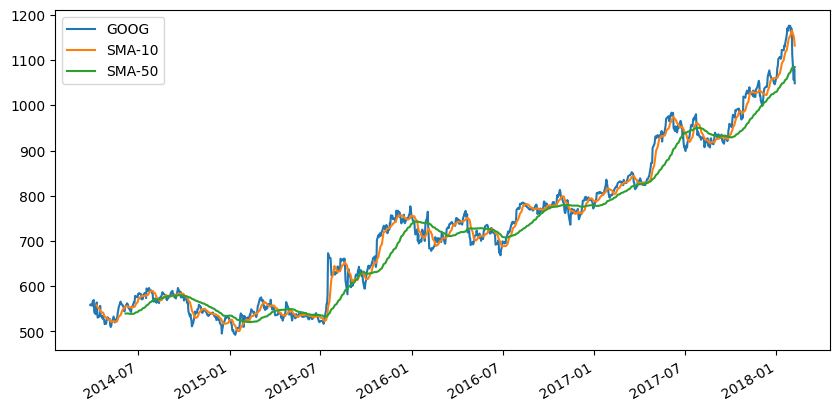

In [ ]:
goog['SMA-50'] = goog['GOOG'].rolling(50).mean()
goog.plot(figsize=(10,5))

### Lesson
- The time-series appears to be lagging
- `SMA-50` is more smoother than `SMA-10`
- The effect appears more pronounced as the window size gets larger

In [ ]:
goog_aapl = close[['GOOG', 'AAPL']].copy().dropna()
cov = goog_aapl.rolling(50).cov()
cov

GOOG       AAPL
2014-03-27 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-28 GOOG          NaN        NaN
           AAPL          NaN        NaN
2014-03-31 GOOG          NaN        NaN
...                      ...        ...
2018-02-05 AAPL    34.825709  17.568865
2018-02-06 GOOG  2691.756465  38.174468
           AAPL    38.174468  19.121371
2018-02-07 GOOG  2678.778214  49.980378
           AAPL    49.980378  22.052882

[1950 rows x 2 columns]

In [ ]:
cov.loc['2018-02-07'].to_numpy()

array([[2678.77821424,   49.98037849],
       [  49.98037849,   22.05288249]])

In [ ]:
goog_aapl_ret = np.log(1 + goog_aapl.pct_change(1))
goog_aapl_ret.head()

,GOOG,AAPL
2014-03-27,NaN,NaN
2014-03-28,0.002736,-0.001117
2014-03-31,-0.005408,-0.000223
2014-04-01,0.018130,0.009106
2014-04-02,-0.000282,0.001661


In [ ]:
goog_aapl_ret['GOOG-SMA-50'] = goog_aapl_ret['GOOG'].rolling(50).mean()
goog_aapl_ret['AAPL-SMA-50'] = goog_aapl_ret['AAPL'].rolling(50).mean()
goog_aapl_ret.head()

,GOOG,AAPL,GOOG-SMA-50,AAPL-SMA-50
2014-03-27,NaN,NaN,NaN,NaN
2014-03-28,0.002736,-0.001117,NaN,NaN
2014-03-31,-0.005408,-0.000223,NaN,NaN
2014-04-01,0.018130,0.009106,NaN,NaN
2014-04-02,-0.000282,0.001661,NaN,NaN


<Axes: >

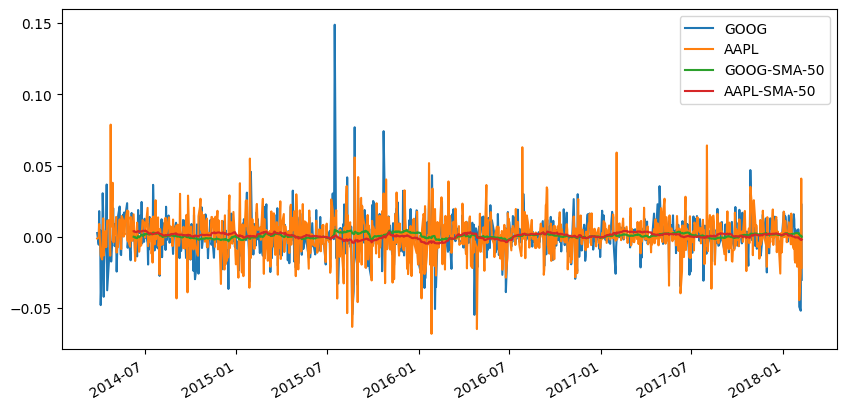

In [ ]:
goog_aapl_ret.plot(figsize=(10,5))

In [ ]:
cov = goog_aapl_ret[['GOOG', 'AAPL']].rolling(50).cov()
cov.tail()

GOOG      AAPL
2018-02-05 AAPL  0.000110  0.000143
2018-02-06 GOOG  0.000193  0.000129
           AAPL  0.000129  0.000177
2018-02-07 GOOG  0.000212  0.000142
           AAPL  0.000142  0.000185

In [ ]:
# rolling correlation
corr = goog_aapl_ret[['GOOG', 'AAPL']].rolling(50).corr()
corr.tail(16)

GOOG      AAPL
2018-01-29 GOOG  1.000000  0.531436
           AAPL  0.531436  1.000000
2018-01-30 GOOG  1.000000  0.525389
           AAPL  0.525389  1.000000
2018-01-31 GOOG  1.000000  0.515233
           AAPL  0.515233  1.000000
2018-02-01 GOOG  1.000000  0.510051
           AAPL  0.510051  1.000000
2018-02-02 GOOG  1.000000  0.671209
           AAPL  0.671209  1.000000
2018-02-05 GOOG  1.000000  0.681098
           AAPL  0.681098  1.000000
2018-02-06 GOOG  1.000000  0.700564
           AAPL  0.700564  1.000000
2018-02-07 GOOG  1.000000  0.716376
           AAPL  0.716376  1.000000